<a href="https://colab.research.google.com/github/MaxCojocari/ML_Express_Tekwill/blob/main/ML_Express_WS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install imperio

In [ ]:
#Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Upload the data frame
df = pd.read_csv('/content/drive/MyDrive/ML_Express/my_exported_data.csv')
df

,rating_score,critic_likes,critic_comments,user_trialist,user_subscriber,user_eligible_for_trial,user_has_payment_method,movie_release_year,movie_title_language,movie_popularity,total_number_of_lists,total_list_comments,total_list_followers,total_list_movie_number,user_id
0,2.0,0,0,1,1,0,1,2005.0,en,1.0,13,25,422,1176,85981819
1,2.0,0,0,0,0,1,1,2005.0,en,1.0,12,5,21,2425,4208563
2,3.0,0,0,0,0,1,0,2005.0,en,1.0,5,1,6,57,9820140
3,3.0,0,0,0,0,1,1,2005.0,en,1.0,6,1,12,172,57756708
4,4.0,0,0,0,0,1,1,2005.0,en,1.0,15,7,7,459,8516503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,0,0,0,1,0,1,1957.0,en,9.0,1,0,0,20,81460954
29996,4.0,0,0,0,0,1,1,1957.0,en,9.0,2,0,6,1044,15967472
29997,2.0,0,0,0,0,1,1,1957.0,en,9.0,1,0,0,3,69474367
29998,2.0,0,0,0,1,0,1,1957.0,en,9.0,25,0,9,1693,67208708


In [ ]:
#Display overall info about your dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rating_score             30000 non-null  float64
 1   critic_likes             30000 non-null  int64  
 2   critic_comments          30000 non-null  int64  
 3   user_trialist            30000 non-null  int64  
 4   user_subscriber          30000 non-null  int64  
 5   user_eligible_for_trial  30000 non-null  int64  
 6   user_has_payment_method  30000 non-null  int64  
 7   movie_release_year       29991 non-null  float64
 8   movie_title_language     29991 non-null  object 
 9   movie_popularity         29991 non-null  float64
 10  total_number_of_lists    30000 non-null  int64  
 11  total_list_comments      30000 non-null  int64  
 12  total_list_followers     30000 non-null  int64  
 13  total_list_movie_number  30000 non-null  int64  
 14  user_id               

In [ ]:
#Find out how many None raws you have in the data
df.isna().sum()

rating_score               0
critic_likes               0
critic_comments            0
user_trialist              0
user_subscriber            0
user_eligible_for_trial    0
user_has_payment_method    0
movie_release_year         9
movie_title_language       9
movie_popularity           9
total_number_of_lists      0
total_list_comments        0
total_list_followers       0
total_list_movie_number    0
user_id                    0
dtype: int64

In [ ]:
#Drop the raws with NaN
df = df.dropna()

In [ ]:
#Final values without NaN
df.isna().sum()

rating_score               0
critic_likes               0
critic_comments            0
user_trialist              0
user_subscriber            0
user_eligible_for_trial    0
user_has_payment_method    0
movie_release_year         0
movie_title_language       0
movie_popularity           0
total_number_of_lists      0
total_list_comments        0
total_list_followers       0
total_list_movie_number    0
user_id                    0
dtype: int64

In [ ]:
#Taking a look at the rating_score distribution
df['rating_score'].value_counts()

4.0    12091
5.0     7988
3.0     7321
2.0     1976
1.0      615
Name: rating_score, dtype: int64

In [ ]:
#user_id doesn't bring significant info in our case. So we can drop this column
df = df.drop(['user_id'], axis=1)
df

,rating_score,critic_likes,critic_comments,user_trialist,user_subscriber,user_eligible_for_trial,user_has_payment_method,movie_release_year,movie_title_language,movie_popularity,total_number_of_lists,total_list_comments,total_list_followers,total_list_movie_number
0,2.0,0,0,1,1,0,1,2005.0,en,1.0,13,25,422,1176
1,2.0,0,0,0,0,1,1,2005.0,en,1.0,12,5,21,2425
2,3.0,0,0,0,0,1,0,2005.0,en,1.0,5,1,6,57
3,3.0,0,0,0,0,1,1,2005.0,en,1.0,6,1,12,172
4,4.0,0,0,0,0,1,1,2005.0,en,1.0,15,7,7,459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,0,0,0,1,0,1,1957.0,en,9.0,1,0,0,20
29996,4.0,0,0,0,0,1,1,1957.0,en,9.0,2,0,6,1044
29997,2.0,0,0,0,0,1,1,1957.0,en,9.0,1,0,0,3
29998,2.0,0,0,0,1,0,1,1957.0,en,9.0,25,0,9,1693


(array([2.9746e+04, 1.4100e+02, 5.5000e+01, 1.9000e+01, 1.0000e+01,
        8.0000e+00, 4.0000e+00, 3.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <a list of 10 Patch objects>)

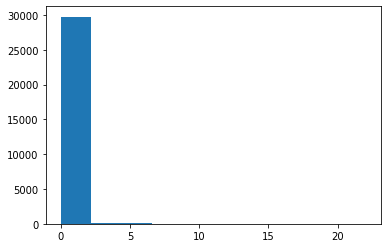

In [ ]:
#Exploring the ratings columns -> critic_likes, critic_comments
plt.hist(df['critic_likes'])

In [ ]:
df['critic_likes'].var()

0.3939134413433202

(array([2.9965e+04, 1.5000e+01, 7.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0. ,  2.9,  5.8,  8.7, 11.6, 14.5, 17.4, 20.3, 23.2, 26.1, 29. ]),
 <a list of 10 Patch objects>)

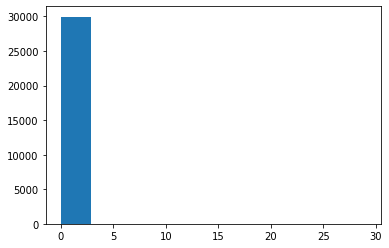

In [ ]:
plt.hist(df['critic_comments'])

(array([[2.9734e+04, 7.0000e+00, 4.0000e+00, 1.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.3700e+02, 3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [5.4000e+01, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.7000e+01, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [9.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [7.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [2.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [3.0000e+00, 0.0000

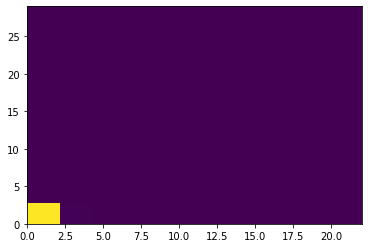

In [ ]:
plt.hist2d(df['critic_likes'], df['critic_comments'])

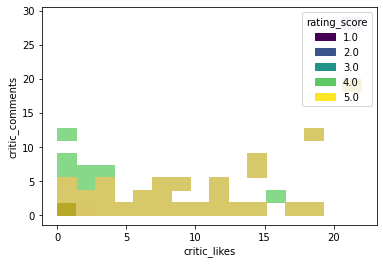

In [ ]:
sns.histplot(df, x = 'critic_likes', y = 'critic_comments', 
             hue = 'rating_score', palette = 'viridis', kde = True)

In [ ]:
#Explore the user data from rating
df['user_trialist'].value_counts()

0    27793
1     2198
Name: user_trialist, dtype: int64

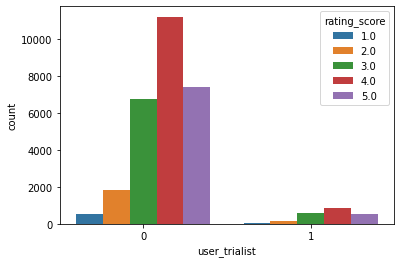

In [ ]:
sns.countplot(data=df, x='user_trialist', hue='rating_score')

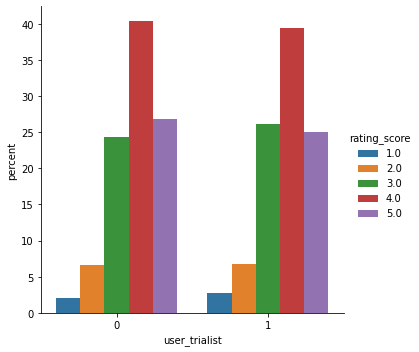

In [ ]:
(df
 .groupby('user_trialist')['rating_score']
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot, 'data'), x='user_trialist', y='percent', hue='rating_score', kind='bar'))

In [ ]:
#Conclusion: the user_trialist 
#does not affect the score that will be given to the movie

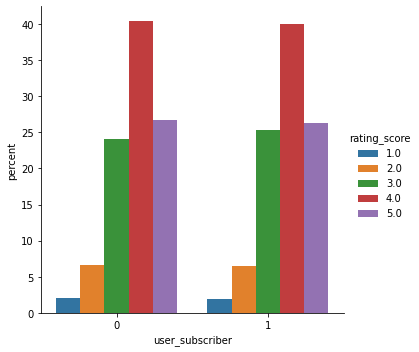

In [ ]:
#user_subscriber
((df
 .groupby('user_subscriber')['rating_score']
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot, 'data'), x='user_subscriber', y='percent', hue='rating_score', kind='bar')))

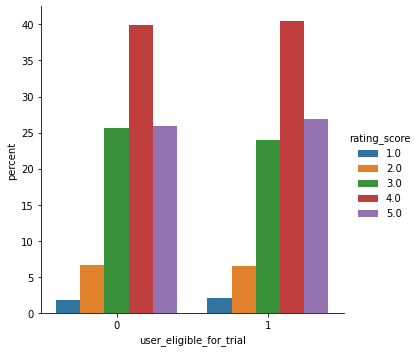

In [ ]:
#user_eligible_for_trial
(df
 .groupby('user_eligible_for_trial')['rating_score']
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot, 'data'), x='user_eligible_for_trial', y='percent', hue='rating_score', kind='bar'))

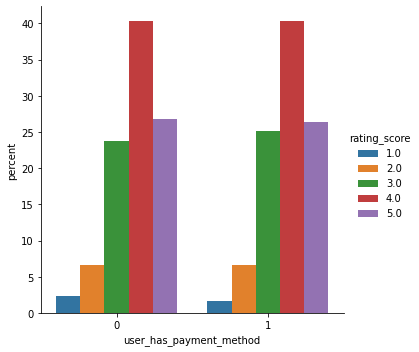

In [ ]:
#user_has_payment_method
(df
 .groupby('user_has_payment_method')['rating_score']
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot, 'data'), x='user_has_payment_method', y='percent', hue='rating_score', kind='bar'))

In [ ]:
#From the results above we can conclude that data
#about the user will not give us to much information for our model

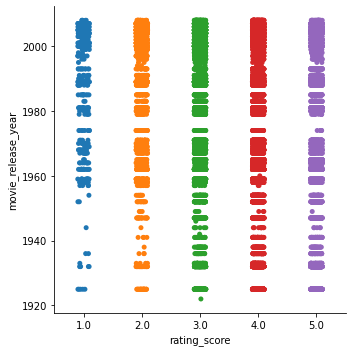

In [ ]:
sns.catplot(x='rating_score', y='movie_release_year', hue='rating_score', data=df)

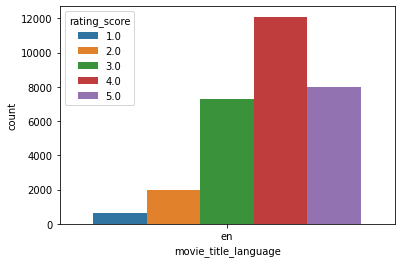

In [ ]:
#movie_title_language
sns.countplot(x='movie_title_language', hue='rating_score', data=df)

In [ ]:
df['movie_title_language'].unique()
#movie_title_language can be removed, because the rating_score does not depend on it

array(['en'], dtype=object)

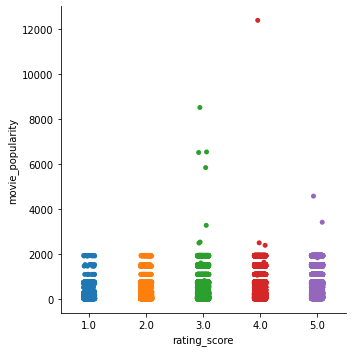

In [ ]:
#movie_popularity
sns.catplot(x='rating_score', y='movie_popularity', hue='rating_score', data=df)

In [ ]:
#we should drop column movie_popularity as well, because it does not differenciate the rating score

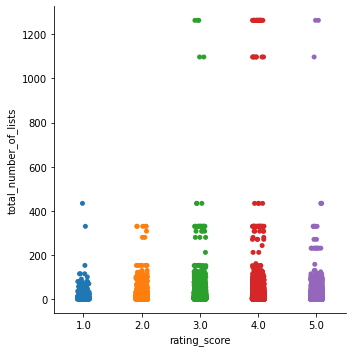

In [ ]:
#total_number_of_lists
sns.catplot(x='rating_score', y='total_number_of_lists', hue='rating_score', data=df)

In [ ]:
#This may be a good feature, people with the higher number of lists are giving the higher scores

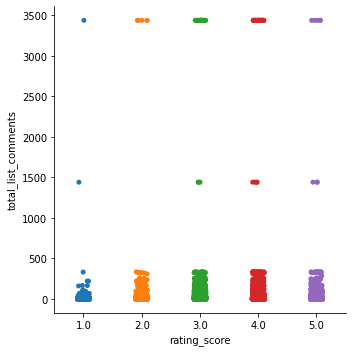

In [ ]:
#total_list_comments
sns.catplot(x='rating_score', y='total_list_comments', hue='rating_score', data=df)

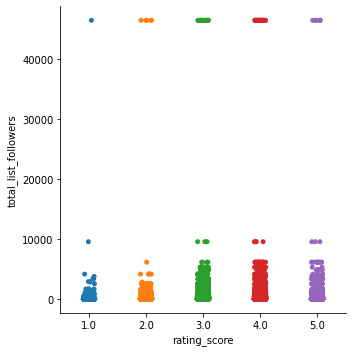

In [ ]:
#total_list_followers
sns.catplot(x='rating_score', y='total_list_followers', hue='rating_score', data=df)

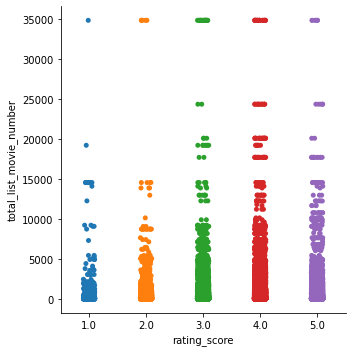

In [ ]:
#total_list_movie_number
sns.catplot(x='rating_score', y='total_list_movie_number', hue='rating_score', data=df)

In [ ]:
# The data dispertion is highly visible, so we can use total_list_movie_number column
# for predicting the score

In [ ]:
# Average number of comments
df['avg_list_comments'] = df['total_list_comments'] / df['total_number_of_lists']
# Average number of followers.
df['avg_list_followers'] = df['total_list_followers'] / df['total_number_of_lists']
# Average number of movies.
df['avg_list_movie_number'] = df['total_list_movie_number'] / df['total_number_of_lists']

In [ ]:
# Let's see how informative are they.

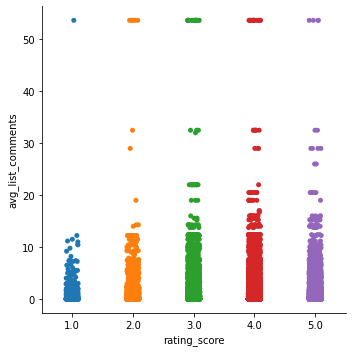

In [ ]:
sns.catplot(x="rating_score", y="avg_list_comments", hue="rating_score", data=df) #yes

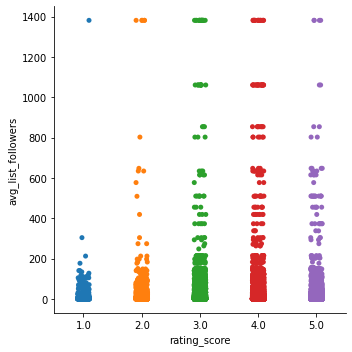

In [ ]:
sns.catplot(x="rating_score", y="avg_list_followers", hue="rating_score", data=df) #yes

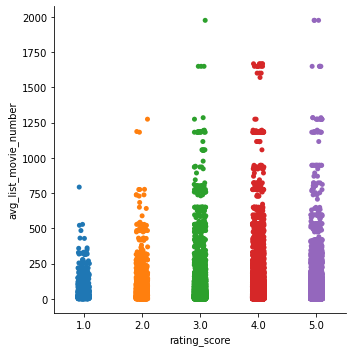

In [ ]:
sns.catplot(x="rating_score", y="avg_list_movie_number", hue="rating_score", data=df) #yes

We can replace the number number columns to the average columns:

a) `total_list_comments` with `avg_list_comments`

b) `total_list_followers` with `avg_list_followers`

c) `total_list_movie_number` with `avg_list_movie_number`

Now we are going to remove columns that are not informative at all.



In [ ]:
non_informative_columns = ['user_trialist', 'user_subscriber', 'user_eligible_for_trial', 'user_has_payment_method']
df = df.drop(non_informative_columns, axis=1)
df.columns

Index(['rating_score', 'critic_likes', 'critic_comments', 'movie_release_year',
       'movie_title_language', 'movie_popularity', 'total_number_of_lists',
       'total_list_comments', 'total_list_followers',
       'total_list_movie_number', 'avg_list_comments', 'avg_list_followers',
       'avg_list_movie_number'],
      dtype='object')

In [ ]:
from imperio import BoxCoxTransformer, YeoJohnsonTransformer
box_cox = BoxCoxTransformer()
new_df = box_cox.apply(df, columns=['critic_likes', 'critic_comments'], target='rating_score')
new_df

,rating_score,critic_likes,critic_comments,movie_release_year,movie_title_language,movie_popularity,total_number_of_lists,total_list_comments,total_list_followers,total_list_movie_number,avg_list_comments,avg_list_followers,avg_list_movie_number
0,2.0,0,-2.0,87.554453,en,1.0,13,25,422,1176,1.923077,32.461538,90.461538
1,2.0,0,-2.0,87.554453,en,1.0,12,5,21,2425,0.416667,1.750000,202.083333
2,3.0,0,-2.0,87.554453,en,1.0,5,1,6,57,0.200000,1.200000,11.400000
3,3.0,0,-2.0,87.554453,en,1.0,6,1,12,172,0.166667,2.000000,28.666667
4,4.0,0,-2.0,87.554453,en,1.0,15,7,7,459,0.466667,0.466667,30.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,0,-2.0,86.475985,en,9.0,1,0,0,20,0.000000,0.000000,20.000000
29996,4.0,0,-2.0,86.475985,en,9.0,2,0,6,1044,0.000000,3.000000,522.000000
29997,2.0,0,-2.0,86.475985,en,9.0,1,0,0,3,0.000000,0.000000,3.000000
29998,2.0,0,-2.0,86.475985,en,9.0,25,0,9,1693,0.000000,0.360000,67.720000


(array([2.9746e+04, 1.4100e+02, 5.5000e+01, 1.9000e+01, 1.0000e+01,
        8.0000e+00, 4.0000e+00, 3.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <a list of 10 Patch objects>)

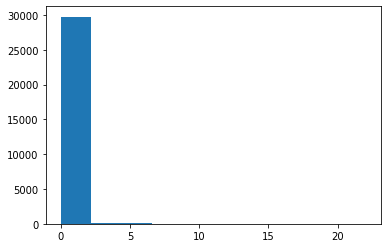

In [ ]:
plt.hist(new_df['critic_likes'])

(array([2.988e+04, 6.300e+01, 2.200e+01, 1.200e+01, 7.000e+00, 3.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([-2.        , -0.92296704,  0.15406592,  1.23109888,  2.30813185,
         3.38516481,  4.46219777,  5.53923073,  6.61626369,  7.69329665,
         8.77032961]),
 <a list of 10 Patch objects>)

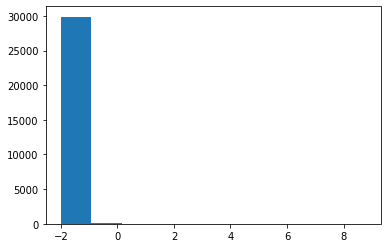

In [ ]:
plt.hist(new_df['critic_comments'])

In [ ]:
yeo_johnson = YeoJohnsonTransformer(l=2)
new_df = yeo_johnson.apply(df, columns=['critic_likes', 'critic_comments'], target='rating_score')
new_df

,rating_score,critic_likes,critic_comments,movie_release_year,movie_title_language,movie_popularity,total_number_of_lists,total_list_comments,total_list_followers,total_list_movie_number,avg_list_comments,avg_list_followers,avg_list_movie_number
0,2.0,0,-0.5,2010012.0,en,1.0,13,25,422,1176,1.923077,32.461538,90.461538
1,2.0,0,-0.5,2010012.0,en,1.0,12,5,21,2425,0.416667,1.750000,202.083333
2,3.0,0,-0.5,2010012.0,en,1.0,5,1,6,57,0.200000,1.200000,11.400000
3,3.0,0,-0.5,2010012.0,en,1.0,6,1,12,172,0.166667,2.000000,28.666667
4,4.0,0,-0.5,2010012.0,en,1.0,15,7,7,459,0.466667,0.466667,30.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,0,-0.5,1914924.0,en,9.0,1,0,0,20,0.000000,0.000000,20.000000
29996,4.0,0,-0.5,1914924.0,en,9.0,2,0,6,1044,0.000000,3.000000,522.000000
29997,2.0,0,-0.5,1914924.0,en,9.0,1,0,0,3,0.000000,0.000000,3.000000
29998,2.0,0,-0.5,1914924.0,en,9.0,25,0,9,1693,0.000000,0.360000,67.720000


The distribution normalizing techniques would not help us. We need also to remove the `movie_title_language` because there majority of values are the same.

In [ ]:
df = df.drop(['movie_title_language'], axis=1)
df.columns

Index(['rating_score', 'critic_likes', 'critic_comments', 'movie_release_year',
       'movie_popularity', 'total_number_of_lists', 'total_list_comments',
       'total_list_followers', 'total_list_movie_number', 'avg_list_comments',
       'avg_list_followers', 'avg_list_movie_number'],
      dtype='object')

In [ ]:
!pip install kydavra

In [ ]:
from kydavra import PValueSelector
p_value = PValueSelector()
selected_cols = p_value.select(df, 'rating_score')
selected_cols

['critic_likes',
 'critic_comments',
 'movie_release_year',
 'movie_popularity',
 'avg_list_comments']

As we can see in this problem we have only 5 columns that are really informative, and we will keep them.

In [ ]:
selected_cols.append('rating_score')
selected_df = df[selected_cols]
selected_df

,critic_likes,critic_comments,movie_release_year,movie_popularity,avg_list_comments,rating_score
0,0,0,2005.0,1.0,1.923077,2.0
1,0,0,2005.0,1.0,0.416667,2.0
2,0,0,2005.0,1.0,0.200000,3.0
3,0,0,2005.0,1.0,0.166667,3.0
4,0,0,2005.0,1.0,0.466667,4.0
...,...,...,...,...,...,...
29995,0,0,1957.0,9.0,0.000000,1.0
29996,0,0,1957.0,9.0,0.000000,4.0
29997,0,0,1957.0,9.0,0.000000,2.0
29998,0,0,1957.0,9.0,0.000000,2.0


In [ ]:
df.to_csv('innitial.csv', index=False)

In [ ]:
selected_df.to_csv('selected.csv', index=False)